In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import choice


In [2]:
data = pd.read_csv("Iris.csv")
data.columns = ["id","s_length","s_width","p_length","p_width","target"]
data.head()

,id,s_length,s_width,p_length,p_width,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
id          150 non-null int64
s_length    150 non-null float64
s_width     150 non-null float64
p_length    150 non-null float64
p_width     150 non-null float64
target      150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [5]:
data.sample(6)

,id,s_length,s_width,p_length,p_width,target
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
70,71,5.9,3.2,4.8,1.8,Iris-versicolor
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
143,144,6.8,3.2,5.9,2.3,Iris-virginica
87,88,6.3,2.3,4.4,1.3,Iris-versicolor
128,129,6.4,2.8,5.6,2.1,Iris-virginica


In [6]:
help(data.sample)

Help on method sample in module pandas.core.generic:

sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None) method of pandas.core.frame.DataFrame instance
    Return a random sample of items from an axis of object.
    
    You can use `random_state` for reproducibility.
    
    Parameters
    ----------
    n : int, optional
        Number of items from axis to return. Cannot be used with `frac`.
        Default = 1 if `frac` = None.
    frac : float, optional
        Fraction of axis items to return. Cannot be used with `n`.
    replace : bool, default False
        Sample with or without replacement.
    weights : str or ndarray-like, optional
        Default 'None' results in equal probability weighting.
        If passed a Series, will align with target object on index. Index
        values in weights not found in sampled object will be ignored and
        index values in sampled object not in weights will be assigned
        weights of zero.
      

In [7]:
data.target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
colours = {'Iris-setosa':'green', 'Iris-versicolor':'blue', 'Iris-virginica':'red'}

In [9]:
for i in range(data.shape[0]):
    data.at[i,"color_label"] = colours[data.iloc[i].target]

In [10]:
data.head()

,id,s_length,s_width,p_length,p_width,target,color_label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,green
1,2,4.9,3.0,1.4,0.2,Iris-setosa,green
2,3,4.7,3.2,1.3,0.2,Iris-setosa,green
3,4,4.6,3.1,1.5,0.2,Iris-setosa,green
4,5,5.0,3.6,1.4,0.2,Iris-setosa,green


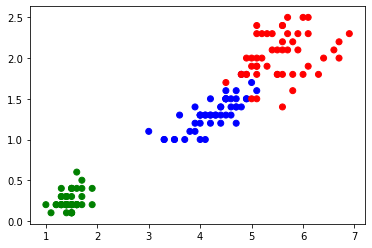

In [11]:
plt.scatter(data.p_length,data.p_width,c=data.color_label)

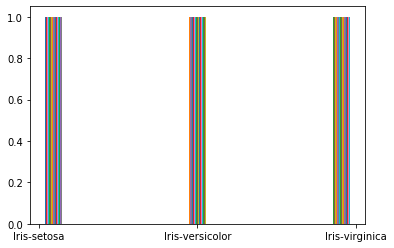

In [12]:
plt.hist(data.target,bins=5)
plt.show()

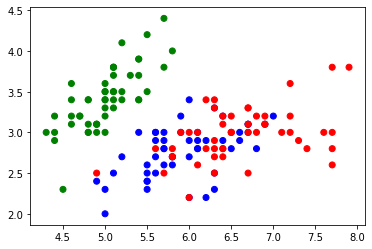

In [13]:
plt.scatter(data.s_length,data.s_width,c=data.color_label)

In [14]:
X = data[["s_length","s_width","p_length","p_width"]]
y = data["target"]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3)

In [16]:
print(X_test.shape, X_train.shape, y_test.shape, y_train.shape)

(45, 4) (105, 4) (45,) (105,)


In [17]:
from sklearn.neighbors import KNeighborsClassifier as knc
model = knc()
print(model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [19]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
print(X_test.iloc[:10])

     s_length  s_width  p_length  p_width
136       6.3      3.4       5.6      2.4
86        6.7      3.1       4.7      1.5
132       6.4      2.8       5.6      2.2
49        5.0      3.3       1.4      0.2
11        4.8      3.4       1.6      0.2
116       6.5      3.0       5.5      1.8
36        5.5      3.5       1.3      0.2
92        5.8      2.6       4.0      1.2
112       6.8      3.0       5.5      2.1
122       7.7      2.8       6.7      2.0


In [22]:
print(y_test.iloc[:10])

136     Iris-virginica
86     Iris-versicolor
132     Iris-virginica
49         Iris-setosa
11         Iris-setosa
116     Iris-virginica
36         Iris-setosa
92     Iris-versicolor
112     Iris-virginica
122     Iris-virginica
Name: target, dtype: object


In [23]:
print(model.predict(X_test.iloc[:10]))

['Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica']


In [24]:
print(y_test.iloc[:10].values)

['Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica']


In [30]:
predicted = model.predict( X_test )
original =y_test.values
wrong = 0
for i in range(len(predicted)):
    if predicted[i] != original[i]:
        wrong = wrong + 1
print(wrong)        

2


In [31]:
model.score(X_train,y_train)

0.9904761904761905

In [32]:
model.score(X_test,y_test)

0.9555555555555556